In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [3]:
with open('../asd-analysis/data_scorenorm/combined_data_score_norms_v3_cont_asd.pkl', 'rb') as file:
    combined_data = pickle.load(file)

In [4]:
score_norms_abcd_val = combined_data['score_norms']['abcd-val']
score_norms_abcd_test = combined_data['score_norms']['abcd-test']
score_norms_abcd_asd = combined_data['score_norms']['abcd-asd']
score_norms_conte = combined_data['score_norms']['conte']
score_norms_ibis_typical = combined_data['score_norms']['ibis-inlier']
score_norms_ibis_hr_typical = combined_data['score_norms']['ibis-hr-inliers']
score_norms_ibis_atypical = combined_data['score_norms']['ibis-atypical']
score_norms_ibis_asd = combined_data['score_norms']['ibis-asd']
score_norms_ibis_ds = combined_data['score_norms']['ibis-ds-sa']

score_norms_abcd = np.concatenate([score_norms_abcd_val, score_norms_abcd_test], axis=0)
score_norms_abcd.shape, score_norms_ibis_typical.shape

((330, 1, 20), (82, 1, 20))

In [5]:
identifiers_abcd_val = combined_data['identifier']['abcd-val']
identifiers_abcd_test = combined_data['identifier']['abcd-test']
identifiers_abcd_asd = combined_data['identifier']['abcd-asd']
identifiers_conte = combined_data['identifier']['conte']
identifiers_ibis_typical = combined_data['identifier']['ibis-inlier']
identifiers_ibis_hr_typical = combined_data['identifier']['ibis-hr-inliers']
identifiers_ibis_atypical = combined_data['identifier']['ibis-atypical']
identifiers_ibis_asd = combined_data['identifier']['ibis-asd']
identifiers_ibis_ds = combined_data['identifier']['ibis-ds-sa']

identifiers_abcd = np.concatenate([identifiers_abcd_val, identifiers_abcd_test], axis=0)
identifiers_abcd.shape

(330,)

In [6]:
print('score_norms_abcd_val\t\t', score_norms_abcd_val.shape)
print('score_norms_abcd_test\t\t', score_norms_abcd_test.shape)
print('score_norms_abcd\t\t', score_norms_abcd.shape)
print('score_norms_abcd_asd\t\t', score_norms_abcd_asd.shape)
print('score_norms_conte\t\t', score_norms_conte.shape)
print('score_norms_ibis_typical\t', score_norms_ibis_typical.shape)
print('score_norms_ibis_hr_typical\t', score_norms_ibis_hr_typical.shape)
print('score_norms_ibis_atypical\t', score_norms_ibis_atypical.shape)
print('score_norms_ibis_asd\t\t', score_norms_ibis_asd.shape)
print('score_norms_ibis_ds\t\t', score_norms_ibis_ds.shape)

score_norms_abcd_val		 (165, 1, 20)
score_norms_abcd_test		 (165, 1, 20)
score_norms_abcd		 (330, 1, 20)
score_norms_abcd_asd		 (161, 1, 20)
score_norms_conte		 (444, 1, 20)
score_norms_ibis_typical	 (82, 1, 20)
score_norms_ibis_hr_typical	 (106, 1, 20)
score_norms_ibis_atypical	 (38, 1, 20)
score_norms_ibis_asd		 (65, 1, 20)
score_norms_ibis_ds		 (28, 1, 20)


In [8]:
score_norms_abcd_val = np.squeeze(score_norms_abcd_val)
score_norms_abcd_test = np.squeeze(score_norms_abcd_test)
score_norms_abcd = np.squeeze(score_norms_abcd)
score_norms_abcd_asd = np.squeeze(score_norms_abcd_asd)
score_norms_conte = np.squeeze(score_norms_conte)
score_norms_ibis_typical = np.squeeze(score_norms_ibis_typical)
score_norms_ibis_hr_typical = np.squeeze(score_norms_ibis_hr_typical)
score_norms_ibis_atypical = np.squeeze(score_norms_ibis_atypical)
score_norms_ibis_asd = np.squeeze(score_norms_ibis_asd)
score_norms_ibis_ds = np.squeeze(score_norms_ibis_ds)

### Harmonization: create scanner and sex dictionary for CONTE.

In [12]:
ebds_scanners = pd.read_excel("/ASD2/emre_projects/OOD/ASD-OOD-Analysis/conte-analysis/conte_spreadsheets/EBDS_8-10_scanners.xlsx")

In [ ]:
ebds_scanners

,case,study,year,s_mri_scanner_ec_final
0,C0553-1-1,Conte,8,P
1,C0184-1-1,Conte,8,T
2,C0197-1-1,Conte,8,T
3,C0461-1-1,Conte,8,P
4,C0596-1-1,Conte,8,P
...,...,...,...,...
375,T0191-1-1,Twin,10,P
376,T0193-1-2,Twin,10,P
377,T0233-1-1,Twin,10,P
378,T0249-1-1,Twin,10,P


### Scanners

P = prisma 

T = Trio

T3 = Trio-update (diffeerent enough from Trio to be considered a different scanner)

In [17]:
ebds_scanners["s_mri_scanner_ec_final"].value_counts()

s_mri_scanner_ec_final
P     268
T3     80
T      29
P2      3
Name: count, dtype: int64

In [ ]:
ebds_scanners_cohorts = pd.read_csv("conte_spreadsheets/EBDS_conte_twin_iq_scanners_emre.csv")

In [19]:
ebds_scanners_cohorts

,image_id,case,year,hr_yn,gest_age_birth,sex,gender,preterm,meduy_enroll,final_diagnosis,premature_37,s_mri_scanner_ec_final,age_at_mri,image,sex.1,Score,Category,group
0,CONTE-TRIOneo-0029-1-1.nii.gz,C0029-1-1,10,0,242,M,1,1,11.0,Healthy Control,1,T,3902,CONTE-TRIOneo-0029-1-1.nii.gz,M,100,Average,1
1,CONTE-TRIOneo-0059-1-1.nii.gz,C0059-1-1,10,0,267,M,1,0,17.0,Healthy Control,0,T,3641,CONTE-TRIOneo-0059-1-1.nii.gz,M,100,Average,1
2,CONTE-TRIOneo-0075-1-1.nii.gz,C0075-1-1,10,0,281,M,1,0,16.0,Healthy Control,0,T,3664,CONTE-TRIOneo-0075-1-1.nii.gz,M,121,High,0
3,CONTE-TRIOneo-0197-1-1.nii.gz,C0197-1-1,8,1,284,M,1,0,12.0,Schizoaffective,0,T,2925,CONTE-TRIOneo-0197-1-1.nii.gz,M,91,Average,0
4,CONTE0038-2-1.nii.gz,C0038-2-1,10,0,279,F,0,0,18.0,Healthy Control,0,P,3835,CONTE0038-2-1.nii.gz,F,112,Average,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,TWINST0313-1-1.nii.gz,T0313-1-1,8,0,260,M,1,0,18.0,NaN,0,P,3035,TWINST0313-1-1.nii.gz,M,121,High,0
235,TWINST0316-1-2.nii.gz,T0316-1-2,8,0,266,F,0,0,16.0,NaN,0,P,2940,TWINST0316-1-2.nii.gz,F,100,Average,1
236,TWINST0323-1-2.nii.gz,T0323-1-2,8,0,217,F,0,1,16.0,NaN,1,P,3040,TWINST0323-1-2.nii.gz,F,94,Average,1
237,TWINST0324-1-2.nii.gz,T0324-1-2,8,0,226,F,0,1,18.0,NaN,1,P,2978,TWINST0324-1-2.nii.gz,F,67,Low,0


In [20]:
ebds_scanners_cohorts["group"].value_counts()

group
1    147
0     92
Name: count, dtype: int64

In [21]:
ebds_scanners_cohorts["s_mri_scanner_ec_final"].value_counts()

s_mri_scanner_ec_final
P     181
T3     51
T       5
P2      2
Name: count, dtype: int64

In [ ]:
# Normalize scanner names directly in ebds_scanners_cohorts
ebds_scanners_cohorts['s_mri_scanner_ec_final'] = ebds_scanners_cohorts['s_mri_scanner_ec_final'].replace({'P2': 'P'})

# Extract identifier by removing '.nii.gz'
ebds_scanners_cohorts['id'] = ebds_scanners_cohorts['image_id'].str.replace('.nii.gz', '', regex=False)

# Create the inlier and outlier scanner dictionaries
conte_inlier_scanner_dict = ebds_scanners_cohorts[ebds_scanners_cohorts['group'] == 1].set_index('id')['s_mri_scanner_ec_final'].to_dict()
conte_outlier_scanner_dict = ebds_scanners_cohorts[ebds_scanners_cohorts['group'] == 0].set_index('id')['s_mri_scanner_ec_final'].to_dict()

# Save to CSV
#ebds_scanners_cohorts.to_csv("conte_spreadsheets/EBDS_conte_twin_iq_id_scanners.csv", index=False)

In [24]:
set(conte_inlier_scanner_dict.values())

{'P', 'T', 'T3'}

In [25]:
set(conte_outlier_scanner_dict.values())

{'P', 'T', 'T3'}

In [26]:
len(set(conte_inlier_scanner_dict.keys())), len(set(conte_outlier_scanner_dict.keys()))

(147, 92)

In [28]:
score_norms_conte.shape

(444, 20)

In [31]:
len(identifiers_conte)

444

In [ ]:
# Make sure 'id' column is already created (identifier without '.nii.gz')
if 'id' not in ebds_scanners_cohorts.columns:
    ebds_scanners_cohorts['id'] = ebds_scanners_cohorts['image_id'].str.replace('.nii.gz', '', regex=False)

# Create a mapping from id to group
id_to_group = ebds_scanners_cohorts.set_index('id')['group'].to_dict()

# Prepare filtered identifiers and data based on group
identifiers_conte_inlier = [id_ for id_ in identifiers_conte if id_to_group.get(id_) == 1]
identifiers_conte_outlier = [id_ for id_ in identifiers_conte if id_to_group.get(id_) == 0]

# Use numpy indexing to split score_norms_conte
index_inlier = [i for i, id_ in enumerate(identifiers_conte) if id_ in identifiers_conte_inlier]
index_outlier = [i for i, id_ in enumerate(identifiers_conte) if id_ in identifiers_conte_outlier]

score_norms_conte_inlier = score_norms_conte[index_inlier]
score_norms_conte_outlier = score_norms_conte[index_outlier]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from neuroCombat import neuroCombat, neuroCombatFromTraining

### --- Step 1: Harmonization with neuroCombat ---

# Create scanner DataFrames for inlier and outlier
scanner_labels_inlier = [conte_inlier_scanner_dict[i] for i in identifiers_conte_inlier]
scanner_labels_outlier = [conte_outlier_scanner_dict[i] for i in identifiers_conte_outlier]

covars_inlier = pd.DataFrame({'batch': scanner_labels_inlier})
covars_outlier = pd.DataFrame({'batch': scanner_labels_outlier})
batch_col = 'batch'

# Train Combat on inliers
combat_train_conte = neuroCombat(
    dat=score_norms_conte_inlier.T,
    covars=covars_inlier,
    batch_col=batch_col,
    eb=False
)

# Apply to outliers
combat_applied_conte = neuroCombatFromTraining(
    dat=score_norms_conte_outlier.T,
    batch=scanner_labels_outlier,
    estimates=combat_train_conte["estimates"]
)

# Transpose back
harmonized_score_norms_conte_inlier = combat_train_conte["data"].T
harmonized_score_norms_conte_outlier = combat_applied_conte["data"].T

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding L/S adjustments without Empirical Bayes
[neuroCombat] Final adjustment of data
[neuroCombatFromTraining] In development ...



In [ ]:
def make_long_df(scores: np.ndarray, ids: list, scanners: list, label: str):
    df = pd.DataFrame(scores, index=ids, columns=[f'Dim_{i+1}' for i in range(scores.shape[1])])
    df['Scanner'] = scanners
    df['Identifier'] = df.index
    long_df = df.melt(id_vars=['Scanner', 'Identifier'], var_name='Dimension', value_name='Score')
    long_df['Label'] = label
    return long_df

# Raw
long_inlier_raw = make_long_df(score_norms_conte_inlier, identifiers_conte_inlier, scanner_labels_inlier, 'Inlier')
long_outlier_raw = make_long_df(score_norms_conte_outlier, identifiers_conte_outlier, scanner_labels_outlier, 'Outlier')

# Harmonized
long_inlier_harmonized = make_long_df(harmonized_score_norms_conte_inlier, identifiers_conte_inlier, scanner_labels_inlier, 'Inlier Harmonized')
long_outlier_harmonized = make_long_df(harmonized_score_norms_conte_outlier, identifiers_conte_outlier, scanner_labels_outlier, 'Outlier Harmonized')

In [35]:
# Define scanner order (modify this to match your real Conte scanner names)
scanner_order = sorted(set(scanner_labels_inlier + scanner_labels_outlier))
palette = sns.color_palette("tab10", n_colors=len(scanner_order))
palette_dict = dict(zip(scanner_order, palette))

def plot_dims(long_df, dims_range, title_prefix):
    dims = [f'Dim_{i}' for i in dims_range]
    fig, ax = plt.subplots(figsize=(16, 5))
    sns.boxplot(
        data=long_df[long_df['Dimension'].isin(dims)],
        x='Dimension',
        y='Score',
        hue='Scanner',
        hue_order=scanner_order,
        palette=palette_dict,
        ax=ax
    )
    ax.set_title(f'{title_prefix} — Dimensions {dims_range[0]}–{dims_range[-1]}')
    ax.tick_params(axis='x', rotation=15)
    ax.legend(loc='upper right')
    plt.tight_layout()

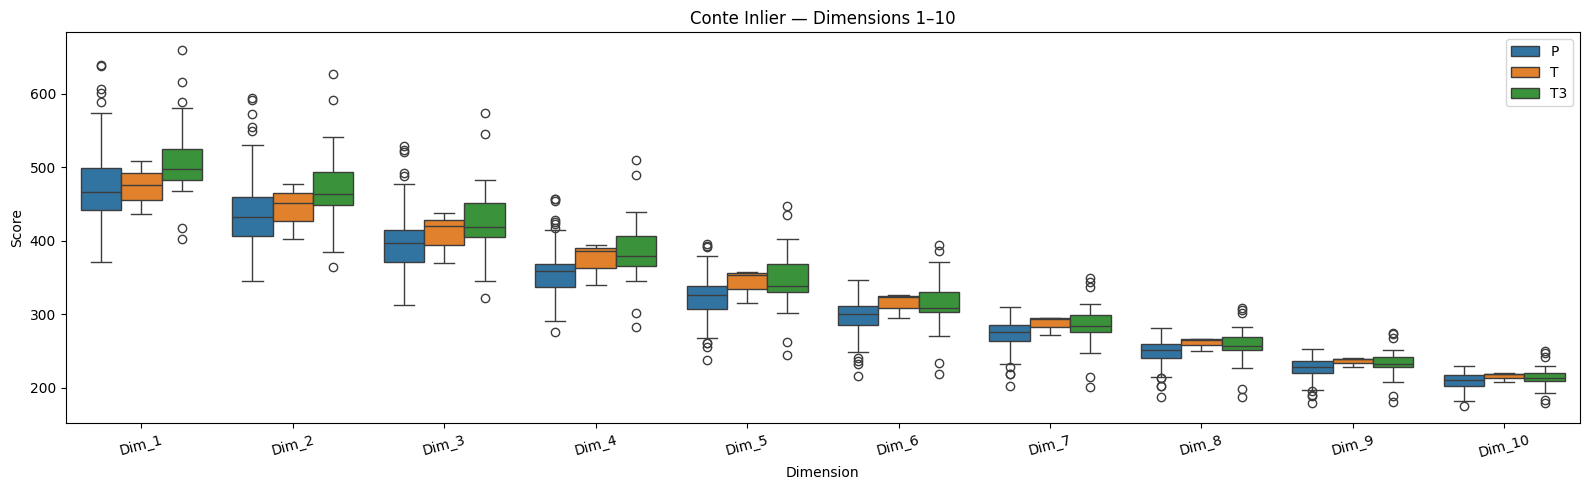

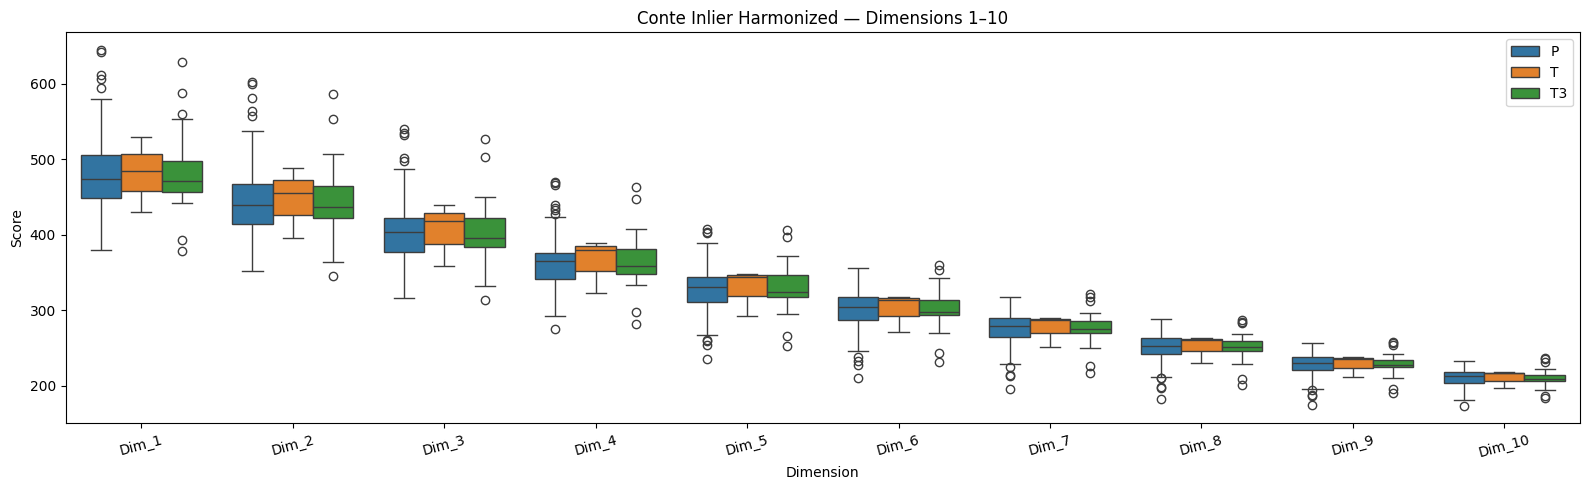

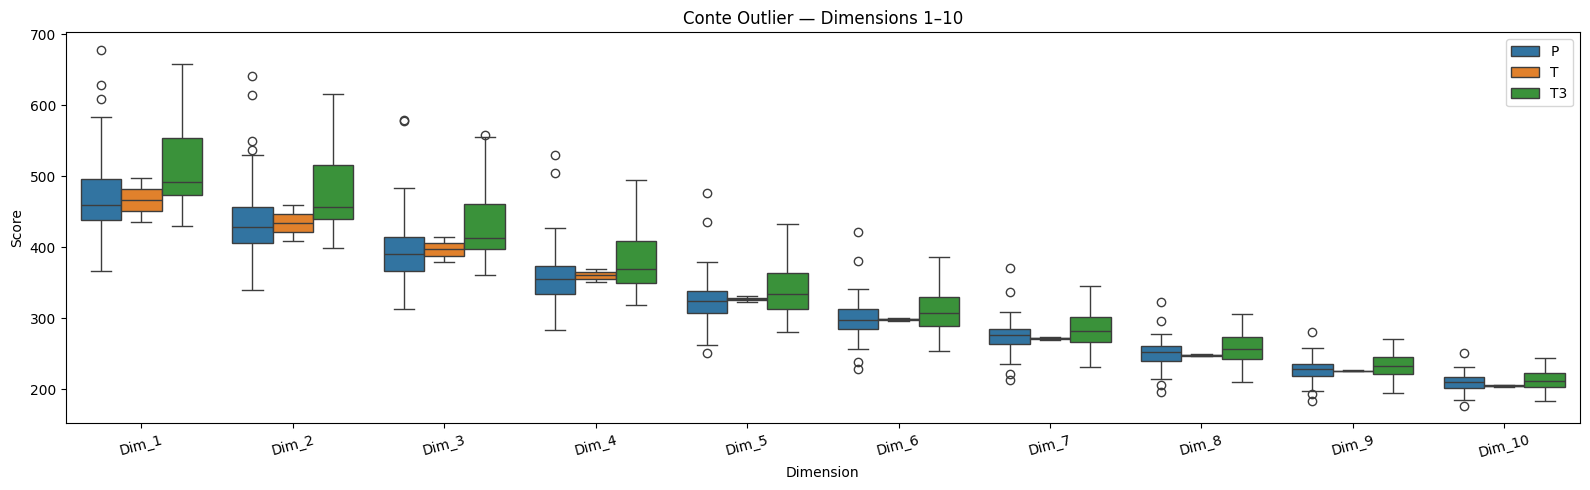

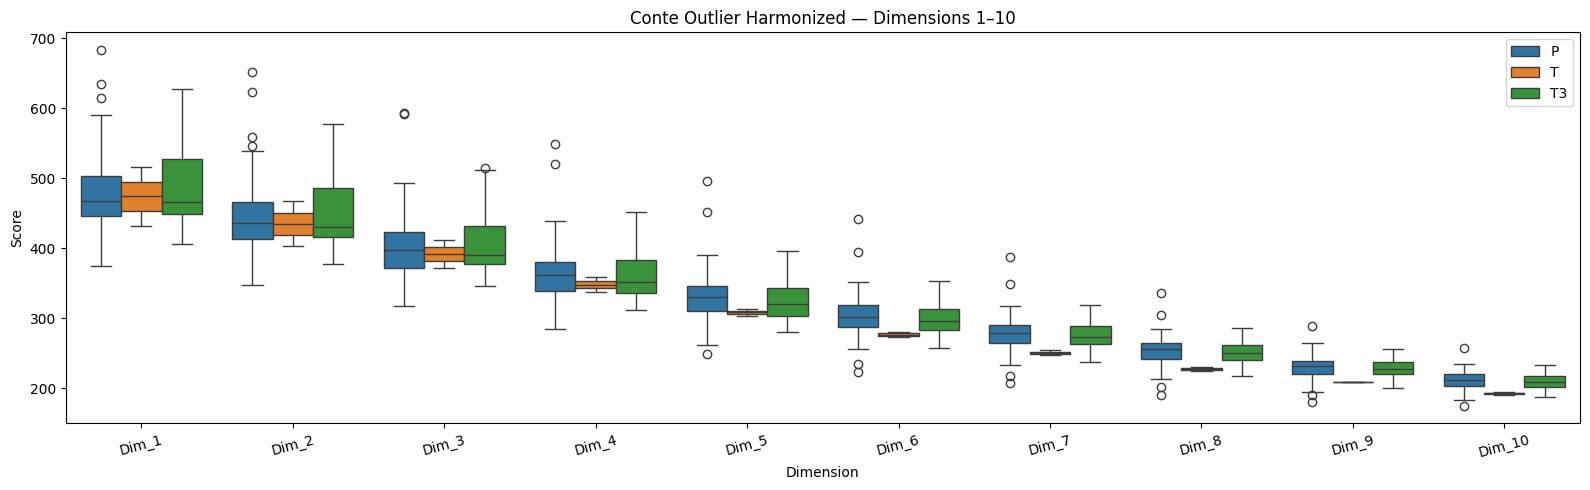

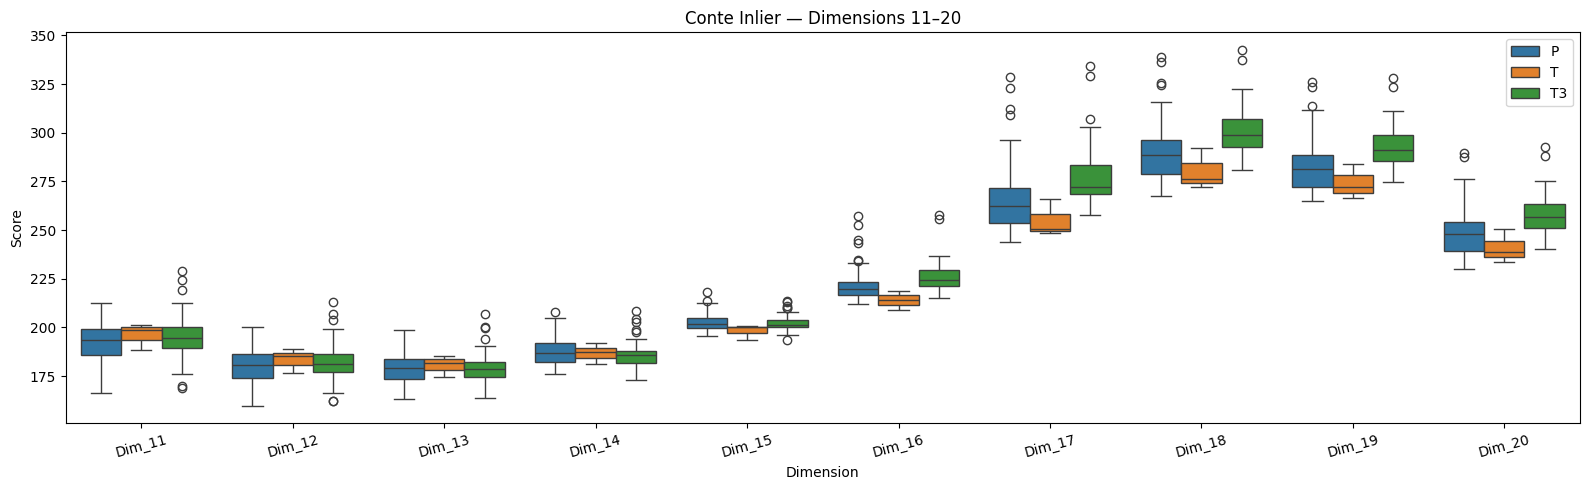

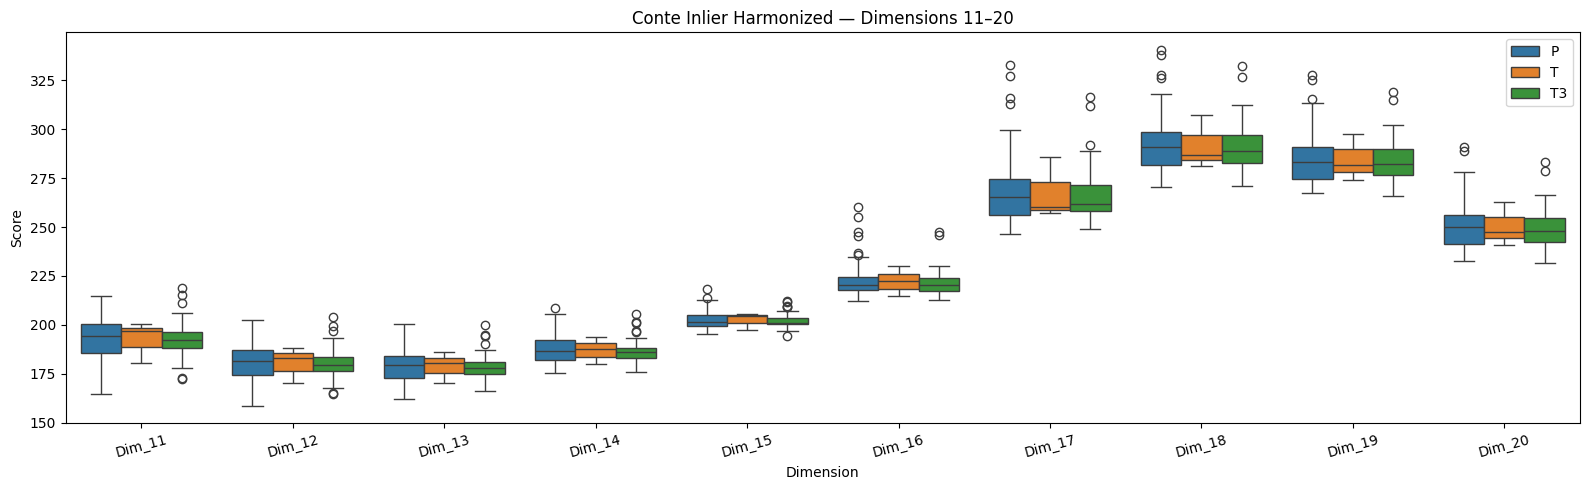

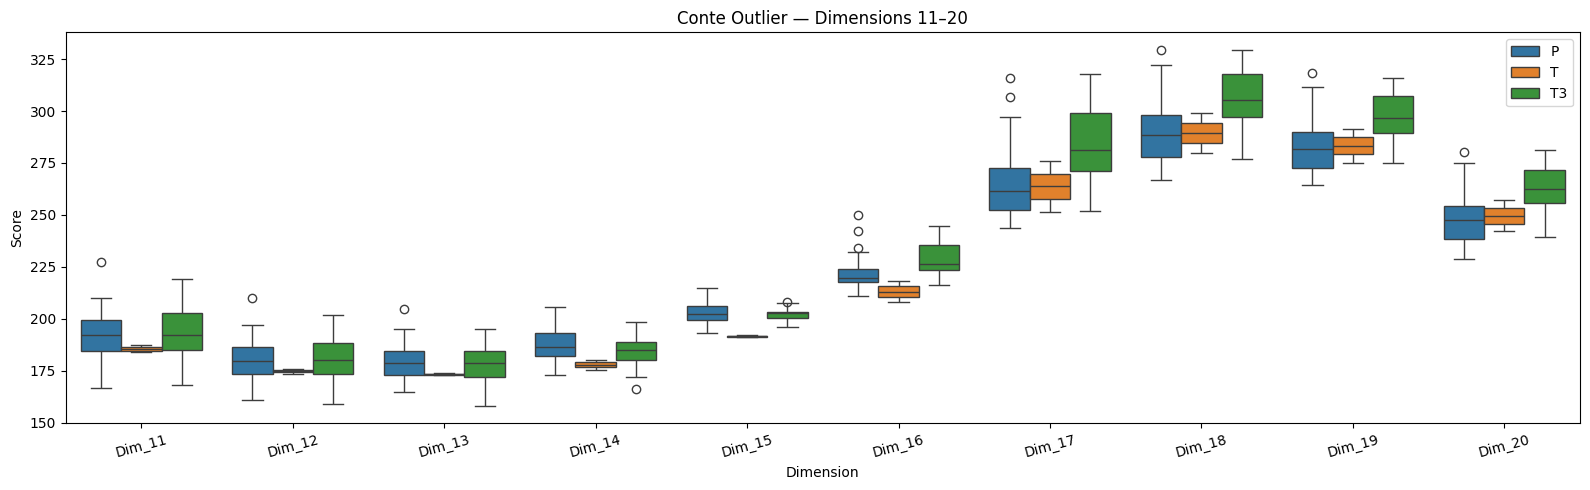

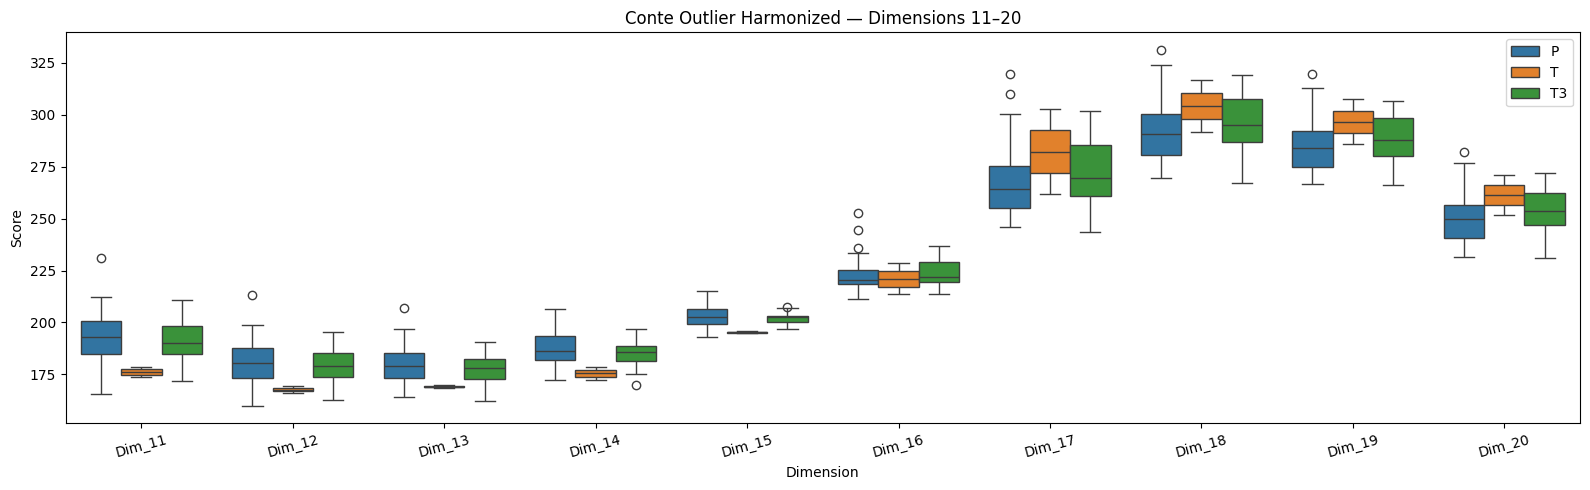

In [36]:
# Plot Dims 1–10
plot_dims(long_inlier_raw, range(1, 11), 'Conte Inlier')
plot_dims(long_inlier_harmonized, range(1, 11), 'Conte Inlier Harmonized')
plot_dims(long_outlier_raw, range(1, 11), 'Conte Outlier')
plot_dims(long_outlier_harmonized, range(1, 11), 'Conte Outlier Harmonized')

# Plot Dims 11–20
plot_dims(long_inlier_raw, range(11, 21), 'Conte Inlier')
plot_dims(long_inlier_harmonized, range(11, 21), 'Conte Inlier Harmonized')
plot_dims(long_outlier_raw, range(11, 21), 'Conte Outlier')
plot_dims(long_outlier_harmonized, range(11, 21), 'Conte Outlier Harmonized')

plt.show()

In [40]:
harmonized_score_norms_conte_inlier.shape, harmonized_score_norms_conte_outlier.shape

((147, 20), (92, 20))

In [37]:
from collections import Counter

print("Inlier scanner counts:")
print(Counter(scanner_labels_inlier))

print("\nOutlier scanner counts:")
print(Counter(scanner_labels_outlier))

Inlier scanner counts:
Counter({'P': 113, 'T3': 31, 'T': 3})

Outlier scanner counts:
Counter({'P': 70, 'T3': 20, 'T': 2})


In [ ]:
import json
import os

# Create output folder if it doesn't exist
output_dir = 'conte_data_scorenorm'
os.makedirs(output_dir, exist_ok=True)

save = False

if save:
    # Save harmonized score norms
    np.save(os.path.join(output_dir, 'harmonized_score_norms_conte_inlier.npy'), harmonized_score_norms_conte_inlier)
    np.save(os.path.join(output_dir, 'harmonized_score_norms_conte_outlier.npy'), harmonized_score_norms_conte_outlier)

    # Save identifier lists
    with open(os.path.join(output_dir, 'identifiers_conte_inlier.json'), 'w') as f:
        json.dump(identifiers_conte_inlier, f)

    with open(os.path.join(output_dir, 'identifiers_conte_outlier.json'), 'w') as f:
        json.dump(identifiers_conte_outlier, f)